In [1]:
"""

"""
from pprint import pprint
from json import dumps
from coinbase.rest import RESTClient
from coinbase.rest.types.accounts_types import ListAccountsResponse
from coinbase.rest.types.product_types import GetProductCandlesResponse
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()
import pandas as pd

client = RESTClient(key_file=os.getenv('COINBASE_API_KEY_FILE'))


In [2]:
accounts: ListAccountsResponse = client.get_accounts()

# pprint(accounts.to_dict(), indent=2)


accounts.accounts

[{'uuid': '5018c40c-69b4-5fdc-bfa4-c520c4266a6f', 'name': 'AAVE Wallet', 'currency': 'AAVE', 'available_balance': {'value': '0.0002021532553941', 'currency': 'AAVE'}, 'default': True, 'active': True, 'created_at': '2024-11-24T17:17:42.794Z', 'updated_at': '2024-11-26T17:55:47.405148Z', 'deleted_at': None, 'type': 'ACCOUNT_TYPE_CRYPTO', 'ready': True, 'hold': {'value': '0', 'currency': 'AAVE'}, 'retail_portfolio_id': 'c6178073-3d59-5f24-8d75-2df8c3d375c8', 'platform': 'ACCOUNT_PLATFORM_CONSUMER'},
 {'uuid': 'cd321efa-9174-504c-8fe9-4239c310555e', 'name': 'BCH Wallet', 'currency': 'BCH', 'available_balance': {'value': '0', 'currency': 'BCH'}, 'default': True, 'active': True, 'created_at': '2024-11-06T06:37:14.234Z', 'updated_at': '2024-11-06T06:37:14.263861Z', 'deleted_at': None, 'type': 'ACCOUNT_TYPE_CRYPTO', 'ready': True, 'hold': {'value': '0', 'currency': 'BCH'}, 'retail_portfolio_id': 'c6178073-3d59-5f24-8d75-2df8c3d375c8', 'platform': 'ACCOUNT_PLATFORM_CONSUMER'},
 {'uuid': '1d8b2a

In [3]:
from datetime import datetime, timedelta

class CBGranularity:
    ONE_MINUTE = 'ONE_MINUTE'
    FIVE_MINUTE = 'FIVE_MINUTE'
    FIFTEEN_MINUTE = 'FIFTEEN_MINUTE'
    THIRTY_MINUTE = 'THIRTY_MINUTE'
    ONE_HOUR = 'ONE_HOUR'
    TWO_HOUR = 'TWO_HOUR'
    SIX_HOUR = 'SIX_HOUR'
    ONE_DAY = 'ONE_DAY'

# Get the price history for a specific product (e.g., BTC-USD)
product_id = 'BTC-USD'
end = datetime.utcnow()
start = end - timedelta(days=1)
granularity = '3600'  # 1 hour
start_timestamp = str(int(start.timestamp()))
end_timestamp = str(int(end.timestamp()))
price_history = client.get_candles(product_id, start=start_timestamp, end=end_timestamp, granularity=CBGranularity.FIFTEEN_MINUTE)

# Print the price history
pprint(price_history.candles, indent=2)
print(type(price_history.candles))

[ {'start': '1750700700', 'low': '102099.01', 'high': '102614.45', 'open': '102455.38', 'close': '102119.63', 'volume': '74.79507286'},
  {'start': '1750699800', 'low': '102138.07', 'high': '102764.45', 'open': '102155.22', 'close': '102447.21', 'volume': '188.13744523'},
  {'start': '1750698900', 'low': '101272.56', 'high': '102367.44', 'open': '101325.48', 'close': '102155.21', 'volume': '217.25001603'},
  {'start': '1750698000', 'low': '100528.82', 'high': '101672.81', 'open': '100743.41', 'close': '101325.48', 'volume': '189.86374539'},
  {'start': '1750697100', 'low': '100251.45', 'high': '101013.99', 'open': '100622.59', 'close': '100743.4', 'volume': '176.8854767'},
  {'start': '1750696200', 'low': '99677.07', 'high': '100801.05', 'open': '100306.1', 'close': '100622.59', 'volume': '504.09691061'},
  {'start': '1750695300', 'low': '100238.71', 'high': '101125.71', 'open': '101125.71', 'close': '100315.01', 'volume': '205.53265372'},
  {'start': '1750694400', 'low': '101116.94', 

In [4]:

def coinbase_candles_to_df(resp: GetProductCandlesResponse) -> pd.DataFrame:
    df = pd.DataFrame.from_records(resp.to_dict()['candles'])
    df['time'] = pd.to_datetime(df['start'], unit='s')
    return df


def coinbase_price_history(product_id: str, bar_count: int, granularity: CBGranularity) -> pd.DataFrame:
    start_timestamp = str(int(start.timestamp()))
    end_timestamp = str(int(end.timestamp()))
    price_history = client.get_candles(product_id, start=start_timestamp, end=end_timestamp, granularity=granularity)



In [5]:
import source.code.coinbase as cb
from source.code.coinbase import FetchConfig

cb.get_price_history('ETH-USD', 1000, fetch_config=FetchConfig('ONE_DAY', timedelta(days=1)), end_date=None)



,Datetime,low,high,open,close,volume
0,2022-09-28,1253.65,1355.34,1327.87,1336.93,488408.682704
1,2022-09-29,1288.12,1351.85,1336.92,1336.02,409208.961750
2,2022-09-30,1315.00,1373.46,1336.04,1328.95,423994.580674
3,2022-10-01,1302.65,1333.99,1328.74,1311.76,98845.973281
4,2022-10-02,1269.69,1318.00,1311.79,1277.02,150803.126007
...,...,...,...,...,...,...
995,2025-06-19,2485.37,2548.35,2525.49,2521.52,51475.781713
996,2025-06-20,2367.58,2569.20,2521.79,2407.20,140906.897149
997,2025-06-21,2217.06,2449.05,2407.20,2297.28,107608.754258
998,2025-06-22,2113.00,2315.15,2297.26,2228.46,224937.833636


In [6]:
from source.code.yfinance_fetch import get_price_history
import matplotlib.pyplot as plt
gc = get_price_history('GC=F', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
cl = get_price_history('CL=F', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
cl.close.plot()
(cl / gc)[['close']].plot()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GC=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CL=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


<Axes: xlabel='Datetime'>

In [7]:
import numpy as np
eth = get_price_history('ETH-USD', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
btc = get_price_history('BTC-USD', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
close_prices = pd.concat([eth.close, btc.close], axis=1).dropna()
close_prices.columns = ['ETH', 'BTC']
close_prices.ETH = np.log(eth.close / eth.close.shift(1)).cumsum() + 2
close_prices.BTC = np.log(btc.close / btc.close.shift(1)).cumsum()
close_prices = close_prices.dropna()
close_prices['ratio'] = close_prices.ETH - close_prices.BTC
# close_prices = close_prices / close_prices.iloc[0] * 10
close_prices.plot(secondary_y=['ratio'])
close_prices

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ETH-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTC-USD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,ETH,BTC,ratio
Datetime,,,


In [8]:
import source.code.settings as settings
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

fetcher = settings.source_settings.get('coinbase')
num_bars = 1000
end_date = datetime.now().replace(second=0, microsecond=0)
data = fetcher.get_price_history('ETH-USD', num_bars, fetch_config=fetcher.get('5 minute'), end_date=end_date - fetcher.get('5 minute').timedelta)

data = data.set_index('Datetime')

assert not data.index.duplicated().any(), "There are duplicate entries in the datetime index"
assert len(data) == num_bars, f"Expected {num_bars} bars, got {len(data)}"
# Assert that there are no gaps in the datetime index
assert data.index.to_series().diff().dropna().eq(pd.Timedelta('5T')).all(), "There are gaps in the datetime index"

data.close.plot()


TypeError: FetchSettings.get_price_history() got an unexpected keyword argument 'fetch_config'

In [ ]:

products = pd.DataFrame.from_records(client.get_products().to_dict()['products'])

NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
emissions = pd.read_excel('./source/code/emissions.ods', engine='odf')
emissions.head()

,Start Date,Epoch,Emissions,Lock Ratio,Unlock Ratio
0,14/09/2024,1,252805.79,100%,0%
1,23/09/2024,2,248128.89,100%,0%
2,30/09/2024,3,243538.50,100%,0%
3,7/10/2024,4,239033.04,100%,0%
4,14/10/2024,5,234610.93,100%,0%


In [ ]:
emmission = 209744.25
apr = 93.6460
price = 1.77
v = 206147.20084146678

v1 = ((emmission*price) / (apr/52))
value = ((emmission*price*52) / (apr))
print('value', value)
emissions['apr'] = ((emissions.Emissions*price) / v) * 52

print(emissions.Emissions.sum())
emissions.loc[emissions['Unlock Ratio'] != '100%'].Emissions.sum()

value 206147.20084146678
8426859.760000002


5713951.82

In [ ]:
def cycle_penalty(nInst, bj, bp_accuracy, cycles, misBr):
    branch_instructions = nInst * bj
    bp_inaccuracy = 1 - bp_accuracy
    mispredicted_branches = branch_instructions * bp_inaccuracy
    cycles_wasted_from_misbr = cycles * misBr
    print("Branch Instructions:", branch_instructions)
    print("Mispredicted Branches:", mispredicted_branches)
    print("Cycles Wasted from Mis-predicted Branches:", cycles_wasted_from_misbr)
    return cycles_wasted_from_misbr / mispredicted_branches



print(cycle_penalty(
    nInst=141536547, 
    bj=0.1281, 
    bp_accuracy=0.8912, 
    cycles=147629281, 
    misBr=0.238
))

print(cycle_penalty(
    nInst=141536547, 
    bj=0.1281, 
    bp_accuracy=0.5097, 
    cycles=218337375, 
    misBr=0.640
))

print(cycle_penalty(
    nInst=141536547, 
    bj=0.1281, 
    bp_accuracy=0.8912, 
    cycles=156109018, 
    misBr=0.313
))


Branch Instructions: 18130831.6707
Mispredicted Branches: 1972634.48577216
Cycles Wasted from Mis-predicted Branches: 35135768.878
17.811596183388527
Branch Instructions: 18130831.6707
Mispredicted Branches: 8889546.768144209
Cycles Wasted from Mis-predicted Branches: 139735920.0
15.719127605104148
Branch Instructions: 18130831.6707
Mispredicted Branches: 1972634.48577216
Cycles Wasted from Mis-predicted Branches: 48862122.634
24.769982977801188


In [10]:
from pycoinmarketcap import CoinMarketCapClient, cmc_api_key
import os
import pandas as pd


In [11]:
import pandas as pd
from source.code.settings import FetchConfig
from pycoinmarketcap import get_price_history
from source.code.settings import source_settings
quotes = get_price_history('ALB', 366, source_settings.get('coinmarketcap').get('1 day'))





quotes

,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,close,volume_24h,market_cap,total_supply,circulating_supply,Datetime,open,high,low,volume
0,-0.540464,-3.005951,-4.123648,-50.494902,0.037716,7847.64,1.003967e+07,2.661890e+08,2.661890e+08,2024-06-24 00:00:00+00:00,0.037716,0.037716,0.037716,0
1,-0.001324,-6.780771,-7.525928,-50.757946,0.035159,2878.85,9.383235e+06,2.668810e+08,2.668810e+08,2024-06-25 00:00:00+00:00,0.035159,0.035159,0.035159,0
2,-0.024281,3.798976,41.876407,-48.389747,0.036495,5330.16,9.763627e+06,2.675366e+08,2.675366e+08,2024-06-26 00:00:00+00:00,0.036495,0.036495,0.036495,0
3,20.441249,34.036406,31.736485,-29.297091,0.048916,11556.76,1.312064e+07,2.682281e+08,2.682281e+08,2024-06-27 00:00:00+00:00,0.048916,0.048916,0.048916,0
4,-0.120481,0.491348,37.259252,-22.329298,0.049156,10113.74,1.321562e+07,2.688487e+08,2.688487e+08,2024-06-28 00:00:00+00:00,0.049156,0.049156,0.049156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.608169,4.499534,-32.488924,-50.590159,0.056076,76874.02,2.279090e+07,4.064295e+08,4.064295e+08,2025-06-19 00:00:00+00:00,0.056076,0.056076,0.056076,0
361,-4.602256,3.598630,-25.292958,-48.461576,0.058094,171751.34,2.362021e+07,4.065869e+08,4.065869e+08,2025-06-20 00:00:00+00:00,0.058094,0.058094,0.058094,0
362,-0.140475,-7.502681,-27.711206,-54.890356,0.053735,48842.37,2.185652e+07,4.067444e+08,4.067444e+08,2025-06-21 00:00:00+00:00,0.053735,0.053735,0.053735,0
363,-2.521729,-8.628480,-26.583720,-58.389661,0.049099,92028.52,1.997752e+07,4.068847e+08,4.068847e+08,2025-06-22 00:00:00+00:00,0.049099,0.049099,0.049099,0


<Axes: xlabel='Datetime'>

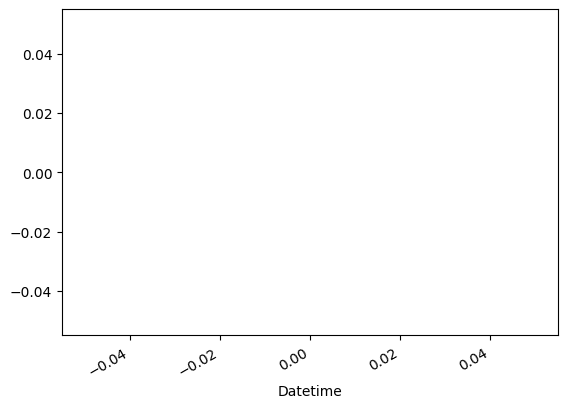

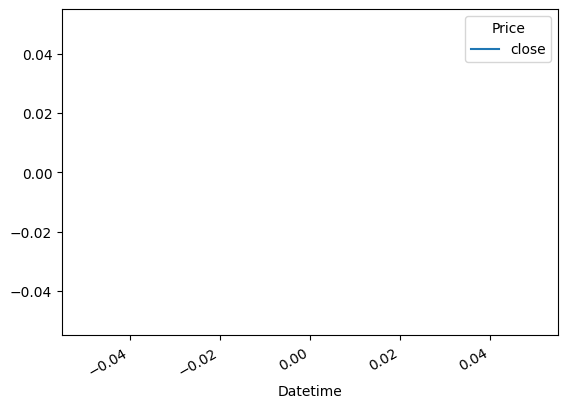

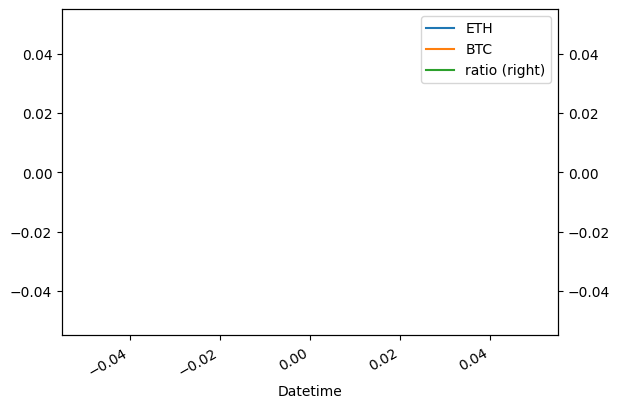

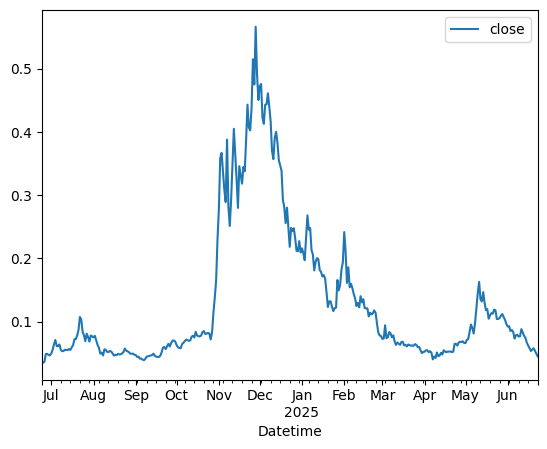

In [12]:
import matplotlib.pyplot as plt
q = quotes.set_index('Datetime')

q[['close']].plot()

In [1]:
from backend.db_setup import SessionLocal
from backend.models import MyStock



with SessionLocal() as session:
    # st = MyStock(
    #     symbol='alienbase',
    #     interval='1 day',
    #     is_relative=False,
    #     data_source='coingecko',
    #     market_index='TEMP',
    #     sec_type='TEMP'
    # )

    # new_st = st.create_up_sample(session, limit=10000)


    cmc = MyStock.get_by_id(session, 41)

    internal = MyStock.get_by_id(session, 44)

    cmc_data = cmc.get_stock_data(session, limit=10000)
    internal_data = internal.get_stock_data(session, limit=10000)

    internal.add_stock_data(cmc_data, session)
    internal_data = internal.get_stock_data(session, limit=10000)






In [2]:
internal_data = internal_data.set_index('timestamp')


<Axes: xlabel='timestamp'>

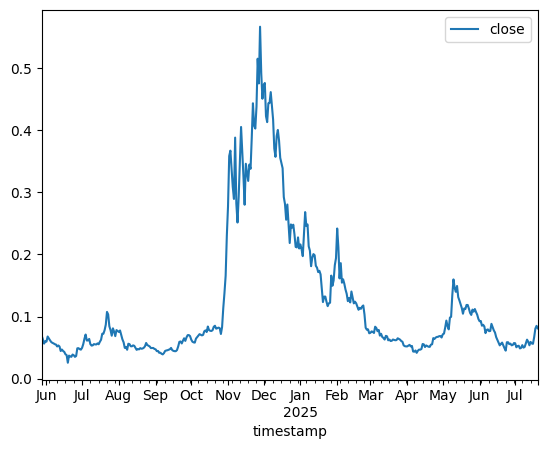

In [3]:
%matplotlib inline
internal_data[['close']].plot()